# <h1 style="color:#FF1493; text-align:center;"><strong>Simple RNN</h1>

**`Problem Statement:`** "Analyze customer reviews to determine overall sentiment, classifying each review as positive or negative based on content."

### <h3 style="color:blue;"><strong>Setup the Environment</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

import pickle

**`Word Embedding vs One-Hot Encoding Compariso`**

| Feature             | One-Hot Encoding                         | Word Embedding                                 |
|---------------------|------------------------------------------|------------------------------------------------|
| **Dimensionality**   | High (equal to vocabulary size)          | Low (fixed size, e.g., 100–300)                |
| **Sparsity**         | Sparse (mostly 0s)                       | Dense (real numbers)                           |
| **Semantic Meaning** | No inherent meaning or similarity        | Captures semantic relationships between words  |
| **Training**         | No training required                     | Requires training or pre-trained embeddings    |
| **Memory Efficiency**| Memory inefficient due to high dimensionality | Memory efficient due to low dimensionality     |
| **Similarity**       | Cannot capture word similarity           | Words with similar meanings have close vectors |


http://localhost:8888/notebooks/learn%2Fgenerative%20AI%2FSimple%20RNN%2FEmbedding_process.ipynb

### <h3 style="color:blue;"><strong>load imdb Dataset</h3>

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
# parameters
max_features = 30000  # Number of words to consider as features



In [4]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [5]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

### <h3 style="color:blue;"><strong>Inspect  a sample review</h3>

In [6]:
sample_review=X_train[0]
sample_review

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 1

In [7]:
sample_label=y_train[0]
sample_label

1

In [8]:
print(f"Sample revies as integers (after one hot operation) \n\n{sample_review}")
print()
print(f"Sample label is {sample_label}")

Sample revies as integers (after one hot operation) 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345,

### <h3 style="color:blue;"><strong>Map the integrs back to words</h3>

In [9]:
word_index=imdb.get_word_index()

In [10]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
# reversing the above key ,value pairs and create a new dictionary
reverse_word_index={value: key for key,value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
# Decoding the review
decode_review=" ".join([reverse_word_index.get(i-3,"") for i in sample_review])
decode_review

# why i-3,The index might get offset due to padding or some new tokens added during preprocessing. Subtracting them by 3 gives u original index

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be prais

In [13]:
# We can see that the review is a postive one and 1 as our ouput
print(sample_label)

1


### <h3 style="color:blue;"><strong>Padding sequence</h3>

In [14]:
from tensorflow.keras.utils import pad_sequences

In [166]:
maxlen = 500  # Cutoff reviews after 500 words
X_train=pad_sequences(X_train,maxlen=maxlen)
X_test=pad_sequences(X_test,maxlen=maxlen)

In [167]:
X_train


array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]])

In [168]:
X_train.shape


(25000, 500)

### <h3 style="color:blue;"><strong>Create Simple RNN</h3>

In [116]:
max_features

30000

In [117]:
# output dimensions
dim=128

In [118]:
from tensorflow.keras.layers import Input,SimpleRNN,Dense,Embedding
from tensorflow.keras.models import Sequential

In [119]:
model=Sequential()
# Input layer
model.add(Input(shape=(maxlen,)))

# Embedding layer
model.add(Embedding(input_dim=max_features,output_dim=dim)) 

# simple RNN
model.add(SimpleRNN(units=128,activation="relu"))

# Add Dense layer
model.add(Dense(1,"sigmoid"))

In [120]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 500, 128)            │       3,840,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,873,025 (14.77 MB)

 Trainable params: 3,873,025 (14.77 MB)

 Non-trainable params: 0 (0.00 B)

### <h3 style="color:blue;"><strong>Early call backs</h3>

In [121]:
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
early_stopping_callbacks=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

### <h3 style="color:blue;"><strong>Compile the model</h3>

In [123]:
model.compile("adam","binary_crossentropy",metrics=["accuracy"])

### <h3 style="color:blue;"><strong>Train the model</h3>

In [124]:
history=model.fit(X_train,y_train,epochs=12,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stopping_callbacks])

Epoch 1/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 181ms/step - accuracy: 0.5945 - loss: 1.6773 - val_accuracy: 0.6520 - val_loss: 0.5939
Epoch 2/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 191ms/step - accuracy: 0.6933 - loss: 51045.0469 - val_accuracy: 0.6377 - val_loss: 0.6004
Epoch 3/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.7653 - loss: 0.4806 - val_accuracy: 0.8175 - val_loss: 0.4278
Epoch 4/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 157s 201ms/step - accuracy: 0.8852 - loss: 0.2834 - val_accuracy: 0.7995 - val_loss: 0.4743
Epoch 5/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 198ms/step - accuracy: 0.9157 - loss: 0.2201 - val_accuracy: 0.8125 - val_loss: 0.4747
Epoch 6/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 151s 192ms/step - accuracy: 0.8887 - loss: 0.3171 - val_accuracy: 0.7985 - val_loss: 0.5034
Epoch 7/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 151s 193ms/step - accuracy: 0.9293 - loss: 0.1778 - val_accuracy: 0.7910 - val_loss: 0.5794
Epoch 8/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 192ms/step - accuracy: 0.95

In [135]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

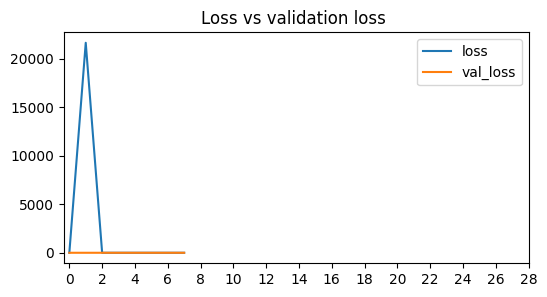

In [136]:
plt.figure(figsize=(6,3));
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xticks(np.arange(0,30,2))
plt.title("Loss vs validation loss ")
plt.legend()

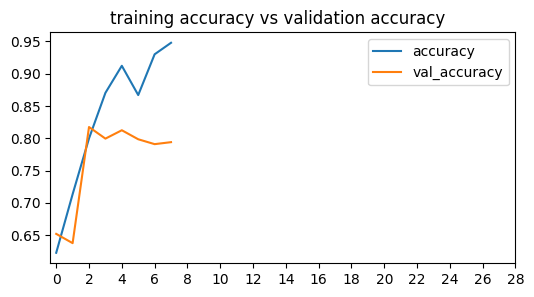

In [137]:
plt.figure(figsize=(6,3));
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xticks(np.arange(0,30,2))
plt.title("training accuracy vs validation accuracy  ")
plt.legend()

In [138]:
va_loss,val_accuracy=model.evaluate(X_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8153 - loss: 0.4322


In [139]:
va_loss,val_accuracy


(0.42776522040367126, 0.8174800276756287)

### <h3 style="color:blue;"><strong>Metricss</h3>

In [140]:
from sklearn.metrics import classification_report,confusion_matrix


In [146]:
y_pred=model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step


In [147]:
y_pred=y_pred.ravel()

In [148]:
y_pred=[1 if i>0.5 else 0 for i in y_pred ]
y_pred

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,


In [149]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     12500
           1       0.84      0.78      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [150]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10702  1798]
 [ 2765  9735]]


### <h3 style="color:blue;"><strong>Save Model</h3>

In [151]:
model.save("simple_rnn_imdb_model.h5")

### <h3 style="color:blue;"><strong>Prediction</h3>

In [152]:
from tensorflow.keras.utils import pad_sequences

In [153]:
def pre_processed_text(text):
    words=text.lower().split()
    encoded_review=[word_index.get(word,2)+3 for word in words] # get the value for the key in dictionary.if no word in dictionary ,replace it with 2 and add 3 to account fo e pripe inexing
    padded_review=pad_sequences(sequences=[encoded_review],maxlen=maxlen)

    return padded_review
    

In [154]:
def predict_sentiment(review):
    pre_processed_input=pre_processed_text(review)
    pred=model.predict(pre_processed_input)
    sentiment ="Positive" if pred[0][0]>0.5 else "Negative"
    return sentiment ,pred[0][0]

### <h3 style="color:blue;"><strong>Testing the model</h3>

In [155]:
# Testing a ppositive review
review="This movie is an absolute masterpiece! From start to finish, it captivates with its engaging storyline, breathtaking visuals"

In [156]:
sentiment,score=predict_sentiment(review)
print(f"Review is :{review}")
print()
print(f"Sentiment of the review is:{sentiment}")
print()
print(f"Score is:{score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Review is :This movie is an absolute masterpiece! From start to finish, it captivates with its engaging storyline, breathtaking visuals

Sentiment of the review is:Positive

Score is:0.9545309543609619


In [157]:
# Negative review
review="I had high expectations for this film, but it turned out to be a major disappointment. The plot was painfully predictable, filled with clichés, and lacked any real depth. The characters were one-dimensional, and their motivations made no sense. It felt like they were just going through the motions with no real connection to the story. Even the acting, which I had hoped would save the film, was subpar. The lead actor seemed bored and disengaged, while the supporting cast barely left an impression. The pacing was another issue—some scenes dragged on for way too long, while others were rushed through without giving the audience a chance to care. Overall, the movie felt like a waste of time, with nothing memorable to take away from it."

In [158]:
sentiment,score=predict_sentiment(review)
print(f"Review is :{review}")
print()
print(f"Sentiment of the review is:{sentiment}")
print()
print(f"Score is:{score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Review is :I had high expectations for this film, but it turned out to be a major disappointment. The plot was painfully predictable, filled with clichés, and lacked any real depth. The characters were one-dimensional, and their motivations made no sense. It felt like they were just going through the motions with no real connection to the story. Even the acting, which I had hoped would save the film, was subpar. The lead actor seemed bored and disengaged, while the supporting cast barely left an impression. The pacing was another issue—some scenes dragged on for way too long, while others were rushed through without giving the audience a chance to care. Overall, the movie felt like a waste of time, with nothing memorable to take away from it.

Sentiment of the review is:Negative

Score is:0.16574476659297943


In [159]:
# Neutral review
review="The movie had decent visuals, but the storyline felt average. It wasn't great, but it wasn't terrible either."

In [160]:
sentiment,score=predict_sentiment(review)
print(f"Review is :{review}")
print()
print(f"Sentiment of the review is:{sentiment}")
print()
print(f"Score is:{score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Review is :The movie had decent visuals, but the storyline felt average. It wasn't great, but it wasn't terrible either.

Sentiment of the review is:Negative

Score is:0.14095257222652435


In [161]:
## for eternals movie
review=""" Eternals is an ambitious entry into the Marvel Cinematic Universe, introducing a new team of cosmic heroes with a rich backstory spanning thousands of years. Directed by Chloé Zhao, the film is visually stunning, showcasing her signature style with breathtaking landscapes and a unique, artful approach to superhero storytelling. The ensemble cast, including Angelina Jolie, Richard Madden, and Gemma Chan, delivers strong performances, bringing depth to their characters.

However, the film's expansive narrative and large number of characters can make it feel somewhat disjointed and slow at times. The intricate lore and numerous plot threads might be overwhelming for some viewers, affecting the pacing. While Eternals explores complex themes like humanity, duty, and the nature of existence, it occasionally struggles to balance these with the expected action and spectacle. Despite its ambitious scope, Eternals stands out for its visual artistry and philosophical depth, though it may not resonate equally with all Marvel fans """

In [162]:
sentiment,score=predict_sentiment(review)
print(f"Review is :{review}")
print()
print(f"Sentiment of the review is:{sentiment}")
print()
print(f"Score is:{score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Review is : Eternals is an ambitious entry into the Marvel Cinematic Universe, introducing a new team of cosmic heroes with a rich backstory spanning thousands of years. Directed by Chloé Zhao, the film is visually stunning, showcasing her signature style with breathtaking landscapes and a unique, artful approach to superhero storytelling. The ensemble cast, including Angelina Jolie, Richard Madden, and Gemma Chan, delivers strong performances, bringing depth to their characters.

However, the film's expansive narrative and large number of characters can make it feel somewhat disjointed and slow at times. The intricate lore and numerous plot threads might be overwhelming for some viewers, affecting the pacing. While Eternals explores complex themes like humanity, duty, and the nature of existence, it occasionally struggles to balance these with the expected action and spectacle. Despite its ambitious scope, Eternals stands out for its visual artist